## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


Here I want to define the Questions I want to answer so I know my steps and workflow..   

1- Does the Jamscount affect JamsDelay?  
2- Does the JamsDelay affect JamsLength?   
3- Traffic Index Week Ago for each city?  
4- which city gets the highest jams?  



Columns i need:   

City  
Jamscount   
JamsDelay  
JamsLength  
TrafficIndexWeekAgo  

# Tasks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\T5\Datasets\Task (2) Dataset.csv")

In [4]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [6]:
df.columns

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')

In [7]:
df = df[['City','JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   JamsCount            66639 non-null  int64  
 2   JamsDelay            66639 non-null  float64
 3   JamsLength           66639 non-null  float64
 4   TrafficIndexWeekAgo  66639 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.5+ MB


In [9]:
df.isnull().sum()

City                   0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
dtype: int64

In [10]:
df.duplicated().sum()

2221

In [11]:
df.shape

(66639, 5)

In [12]:
df.drop_duplicates(inplace=True)

C:\Users\Rawan\AppData\Local\Temp\ipykernel_16388\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [13]:
df.shape

(64418, 5)

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [14]:
df.describe()

,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo
count,64418.000000,64418.000000,64418.000000,64418.000000
mean,76.812444,298.229125,51.009499,14.420457
std,108.403332,474.976157,86.314437,13.467980
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,32.000000,3.600000,4.000000
50%,31.000000,104.100000,13.400000,11.000000
75%,98.000000,348.900000,56.400000,22.000000
max,1359.000000,9989.400000,1173.900000,138.000000


In [17]:
df.corr(numeric_only=True)

,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo
JamsCount,1.000000,0.982301,0.952312,0.803381
JamsDelay,0.982301,1.000000,0.962242,0.772280
JamsLength,0.952312,0.962242,1.000000,0.785666
TrafficIndexWeekAgo,0.803381,0.772280,0.785666,1.000000


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

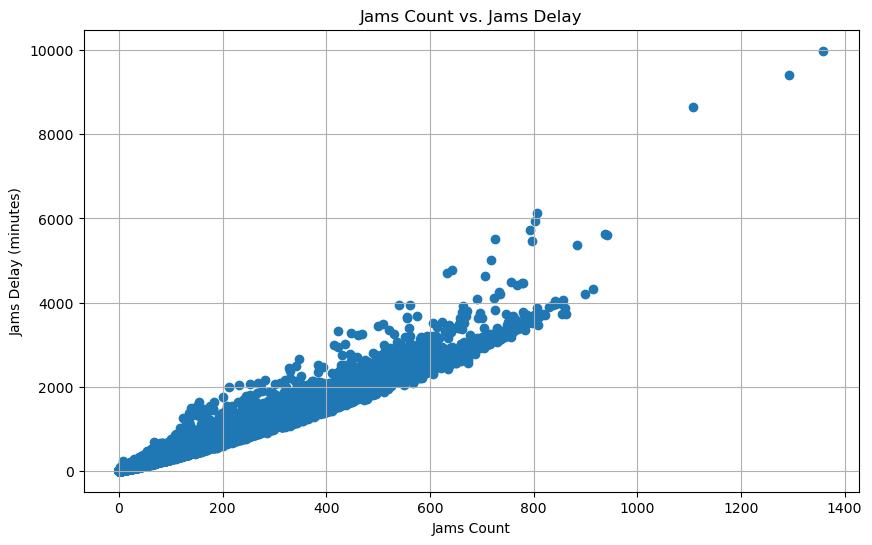

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['JamsCount'], df['JamsDelay'])
plt.xlabel('Jams Count')
plt.ylabel('Jams Delay (minutes)')
plt.title('Jams Count vs. Jams Delay')
plt.grid(True)
plt.show()

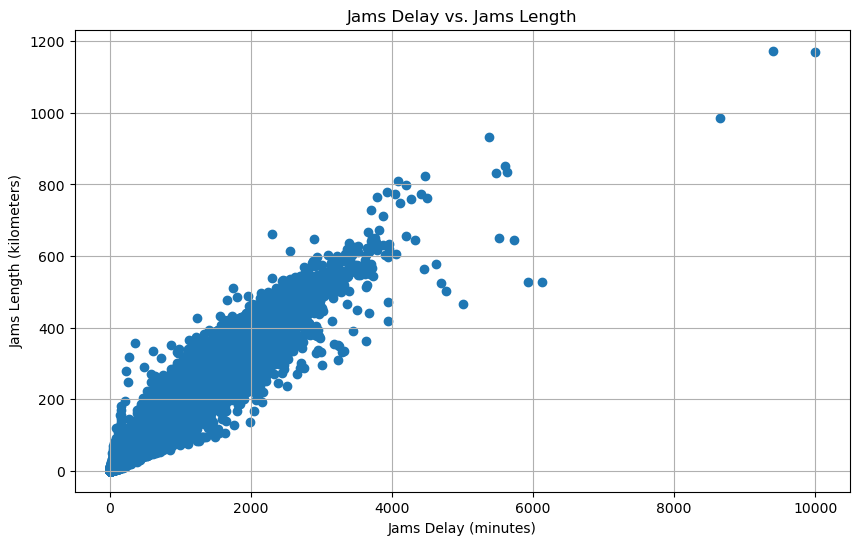

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['JamsDelay'], df['JamsLength'])
plt.xlabel('Jams Delay (minutes)')
plt.ylabel('Jams Length (kilometers)')
plt.title('Jams Delay vs. Jams Length')
plt.grid(True)
plt.show()

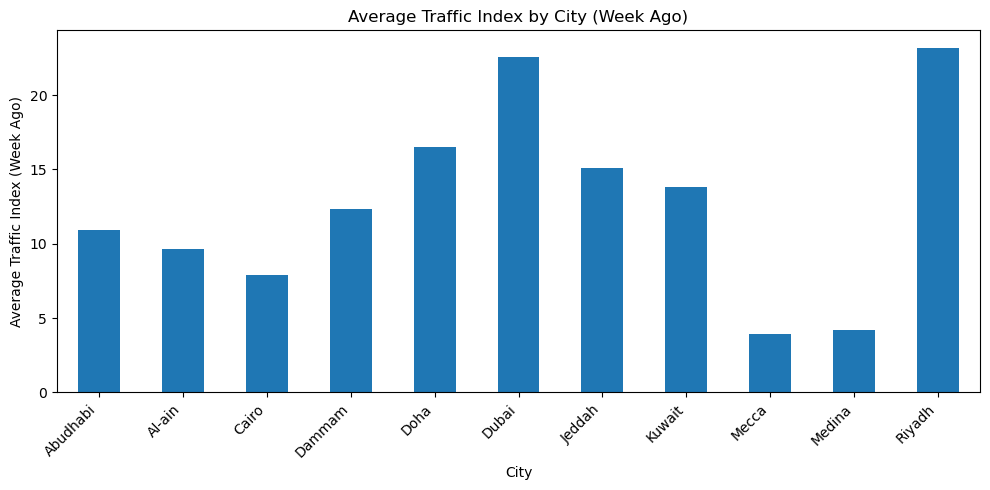

In [30]:
avg_traffic_index_by_city = df.groupby('City')['TrafficIndexWeekAgo'].mean()

plt.figure(figsize=(10, 5))
avg_traffic_index_by_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Average Traffic Index (Week Ago)')
plt.title('Average Traffic Index by City (Week Ago)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


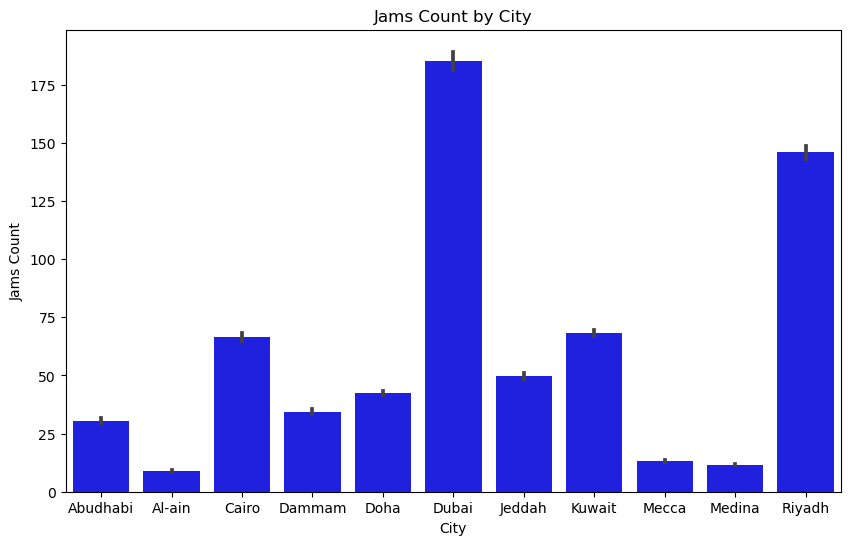

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='JamsCount', data=df, color='b')
plt.title('Jams Count by City')
plt.xlabel('City')
plt.ylabel('Jams Count')
plt.show()

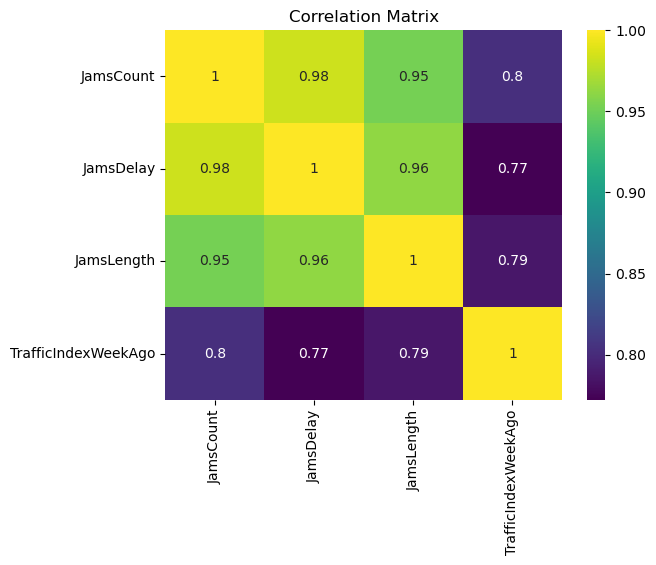

In [37]:
corr_df = df.corr(numeric_only=True)

sns.heatmap(corr_df, annot=True, cmap='viridis')

plt.title('Correlation Matrix')
plt.show()

## 3. Insights and Conclusions

1- Does the Jamscount affect JamsDelay?   
Yes, and a strong linear relationship    

2- Does the JamsDelay affect JamsLength?  
Yes, and a strong linear relationship    

3- Traffic Index Week Ago for each city?  
Avreg Traffic for Dubai 25, and for Riyadh 24   
 
4- which city gets the highest jams?  
Dubai, then Riyadh  